#**An Exploration of Abstractive Text Summarisation: The Use of a Transformer-based Approach**

## **1. Introduction**

<p align = 'justify'>Due to digitalization and expanding textual data, information overload is a major issue, making automatic text summarisation necessary since human summarisation is tedious and time-consuming (Yadav et al., 2022). Automatic text summarisation is a Natural Language Processing (NLP) technique, which involves the condensation of long text to a meaningful and concise one (Rathi et al., 2022).  The two primary summarisation approaches are extractive and abstractive. The former uses words from the original text, while the latter paraphrases and uses new words (Zhu, 2021). </p>

<p align = 'justify'>Since extractive techniques are mature, this research will explore abstractive summarisation approaches, particularly the novel use of transformers (Widyassari et al., 2022; Gupta, 2022). Through discussion and application of relevant models, this project will enrich text summarisation knowledge for text analytics practitioners.</p>  

---
## **2. Installation and Importation of Dependencies**

In [ ]:
!pip install transformers
!pip install evaluate
!pip install rouge_score
!pip install PyMuPDF bert-score
!pip install torch
!pip install ipywidgets
!pip install re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=6c8a4a6e19bf6b253edfb5374c96160eb837d28c0b0403d270d827b65e4e3139
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Succes

In [ ]:
#importing of classes from the transformers library for implementation of text summarisation models
from transformers import pipeline, set_seed
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import AutoTokenizer, PegasusForConditionalGeneration

#importing of necessary data preparation libraries for text summarisation and transformer operations
import torch
import pandas as pd
import numpy as np
import re
import textwrap

#importing evaluation metric, rouge to assess model's performance
import evaluate
from evaluate import load

In [ ]:
# Set the seed to ensure reproducibility in each runtime
set_seed(123)

---
## **3. Importing Dataset & Data Pre-processing**





### **3.1 Importing of CSV File** ###
The BBC news article dataset consist of 2,225 news articles across different categories, Business, Entertainment, Politics, Sports and Technology. [Kaggle BBC](https://www.kaggle.com/datasets/moazeldsokyx/bbc-news)


In [ ]:
#read csv into the environment
df_bbc_all = pd.read_csv('bbc-text.csv')
df_bbc_all

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


This project uses a sample of 1 news article from 5 different categories due to limited computational resources.  



In [ ]:
# Code to extract only 5 observations

# Specify the categories of interest
categories = ['tech', 'business', 'sport', 'politics', 'entertainment']
df_bbc = []

# Iterate over the categories and select the one observation from each categories
# Append to new datafram df_bbc
for category in categories:
    df_category = df_bbc_all[df_bbc_all['category'] == category].head(1)
    df_bbc.append(df_category)

# Concatenate into one dataframe
df_bbc = pd.concat(df_bbc)

# Reset the index, dropping the old index, return new dataframe
df_bbc.reset_index(drop=True, inplace=True)

# Check the new dataframe
print(df_bbc)

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3       politics  howard hits back at mongrel jibe michael howar...
4  entertainment  ocean s twelve raids box office ocean s twelve...


**Data Pre-processing**

In [ ]:
# Data Pre-processing

# Conversion of text to lower-casing characters
df_bbc['clean_text'] = df_bbc['text'].str.lower()

# Removal of whitespaces and non-alphabatical characters
df_bbc['clean_text'] = df_bbc['clean_text'].str.replace('[^a-z\s]', '', regex=True)

# Removal of multiple consecutive whitespaces and replacing it with a single black whitespace
df_bbc['clean_text'] = df_bbc['clean_text'].str.replace('\s+', ' ', regex=True)

# Conversion to a pandas dataframe for transformer operations
df_bbc = pd.DataFrame(df_bbc)

In [ ]:
df_bbc

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...
3,politics,howard hits back at mongrel jibe michael howar...,howard hits back at mongrel jibe michael howar...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...


In [ ]:
# To check which device is being utilised for the models
# In this project, T4 GPU will be used for faster processing
# Can be changed by clicking Runtime -> Change runtime type -> select T4 GPU
# Use of GPU T4 on Google Colab environment would have runtime of approximately
# 3Mins20S, 1Min30S and 5mins for PEGASUS, BART and T5 respectively.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device used: {device}")

Device used: cpu


---
## **4. Text Summarisation Models**

<p align = 'justify'>The use of transformer approach has significantly improved the performance of abstractive text summarisation task. The process of using encoder-decoder in sequence-to-sequence learning, allows contextual information to be captured, thus generating concise summaries (Wang et al., 2021; Syed et al., 2021). To gain a deeper understanding of transformers in text summarization, it's crucial to take hands-on approaches, demonstrated here with PEGASUS, BART, and T5.<p/>

### **4.1. Pegasus**

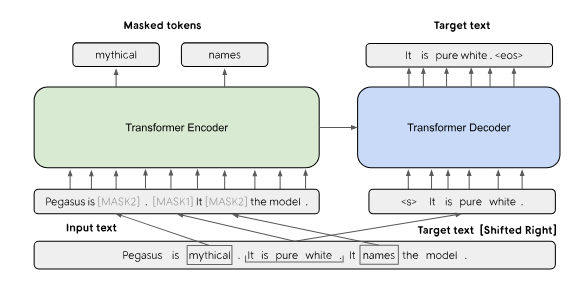 <br>
Figure 1. PEGASUS Diagram Example

<p align = 'justify'>The PEGASUS model, created by Zhang et al., (2020), uses a transformer encoder-decoder approach. The model relies on a self-supervised pre-training objective for abstractive summarisation, most fundamentally, gap-sentences generation (GSG). As shown in figure 1, GSG mask whole sentences of a document, and concatenate the gap-sentences into a pseudo-summary to better allow whole-document understanding to create summaries. It is robust, having a total of 562m training parameters, and trained on downstream dataset, which includes news articles from CNN/DailyMail.<p/>

<p align = 'justify'>The PEGASUS model is commonly used for research article summarization, aiding researchers in efficient comprehension (Reddy et al., 2023). Additionally, it finds application in summarizing news articles, particularly in time-sensitive domains like politics and sports, catering to analysts with limited reading time (Jouda, 2023). This project presents the PEGASUS model in a ready-to-use fashion, allowing quick implementation.<p/>

In [ ]:
# Initialise Model & Tokenizer (pre-trained CNN dailymail model)
model_pegasus = PegasusForConditionalGeneration.from_pretrained("google/pegasus-cnn_dailymail")

tokenizer = AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [ ]:
# Tokenise text and ensuring truncation and padding to maximum of 1024 tokens
# Returns output of PyTorch Tensors
inputs = tokenizer(df_bbc['clean_text'].tolist(), truncation=True, padding=True, max_length=1024, return_tensors="pt")

In [ ]:
# Generate summaries with a maximum output of 100
summary_ids = model_pegasus.generate(inputs["input_ids"], max_length=100)

# Decoding of summaries
summaries = tokenizer.batch_decode(summary_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)

# Adding the summaries back to the DF
df_bbc['summary_pegasus'] = summaries

# Cleaning up the output
df_bbc['summary_pegasus'] = df_bbc['summary_pegasus'].str.replace('<n>', '')

# Print the DataFrame with the new summaries
print(df_bbc[['clean_text', 'summary_pegasus']])

                                          clean_text  \
0  tv future in the hands of viewers with home th...   
1  worldcom boss left books alone former worldcom...   
2  tigers wary of farrell gamble leicester say th...   
3  howard hits back at mongrel jibe michael howar...   
4  ocean s twelve raids box office ocean s twelve...   

                                     summary_pegasus  
0  Digital and personal video recorders dvr and p...  
1  defence lawyers have been arguing that mr ebbe...  
2  leicester will not be rushed into making a bid...  
3  Labour leader peter hain accused the tory lead...  
4  ocean s twelve took m m in weekend ticket sale...  


In [ ]:
# Display the summary of the first observation
summary_pegasus_example = df_bbc['summary_pegasus'][0]

summary_pegasus_example_wrapped = textwrap.fill(summary_pegasus_example, width=80)

print(summary_pegasus_example_wrapped)

Digital and personal video recorders dvr and pvr one of the most talkedabout
technologies of ces .Technology allows for much more personalised tv
.Highdefinition programming not only can forward wind through adverts but can
also forget about abiding by network and channel schedules .Networks in terms of
channels could take a leaf out of google s book and help people find what they
want to watch .


### **4.2. BART**
<p align = 'justify'>BART (Bidirectional and Auto-Regressive Transformers) is a transformer-based model designed to denoise documents corrupted by different techniques, such as shuffling and removing sentences. It employs a sequence-to-sequence architecture with a bidirectional encoder over corrupted text and a left-to-right autoregressive decoder (Lewis et al., 2019). The decoder is autoregressive, and it is regulated for generating sequential NLP tasks such as text summarization (Gupta et al., 2022).<p/>

<p align = 'justify'>BART is particularly effective when fine-tuned for text generation and works well for comprehension tasks (Lewis et al., 2019). The model has shown strong performance in various NLP tasks including abstractive dialogue and summarization tasks. We used the pre-trained model "*facebook/bart-large-cnn*" and the BART tokenizer, resulting in different encodings for words based on their position in the sentence.<p/>


In [ ]:
# Load pre-trained BART model and tokenizer
model_name = "facebook/bart-large-cnn"

tokenizer = BartTokenizer.from_pretrained(model_name)

model = BartForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
# Iterate over each article and generate summary
summaries = []
for article in df_bbc['clean_text']:
    # Tokenize input text
    inputs = tokenizer(article, return_tensors="pt", max_length=1024, truncation=True)

    # Generate summary
    summary_ids = model.generate(inputs.input_ids, max_length=100, min_length=40, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    summaries.append(summary)

# Add summaries to dataframe
df_bbc['summary_bart'] = summaries

# Print the DataFrame with the new summaries
print(df_bbc[['clean_text', 'summary_bart']])

                                          clean_text  \
0  tv future in the hands of viewers with home th...   
1  worldcom boss left books alone former worldcom...   
2  tigers wary of farrell gamble leicester say th...   
3  howard hits back at mongrel jibe michael howar...   
4  ocean s twelve raids box office ocean s twelve...   

                                        summary_bart  
0  The way people watch tv will be radically diff...  
1  worldcom boss left books alone former worldcom...  
2  tigers wary of farrell gamble leicester say th...  
3  howard hits back at mongrel jibe michael howar...  
4  ocean s twelve raids box office ocean s twelve...  


In [ ]:
# Display the summary of the first observation
summary_bart_example = df_bbc['summary_bart'][0]

summary_bart_example_wrapped = textwrap.fill(summary_bart_example, width=80)

print(summary_bart_example_wrapped)

The way people watch tv will be radically different in five years time according
to an expert panel which gathered at the annual consumer electronics show in las
vegas. programmes and other content will be delivered to viewers via home
networks through cable satellite telecoms companies and broadband service
providers to front rooms and portable devices.


### **4.3. T5**

<p align = 'justify'>T5 (text-to-text transfer transformer) is pre-trained by Google to tackle a range of text-related problems. According to Colin Raffel et al. (2020), the approach considers every text processing challenge as a "text-to-text" matter, simplifying the processing pipeline and enabling the use of a unified model structure, pre-training approach, and fine-tuning for many jobs into one model. This integrated method reduces the intricacy of employing diverse NLP models for various applications.<p/>

<p align = 'justify'>TT5 is pretrained using the "Colossal Clean Crawled Corpus (C4)" dataset, which contains a wide variety of web content from Common Crawl.<p/>

<p align = 'justify'>Nevertheless, the use of T5's both encoder-decoder approach leads to heightened complexity and computing cost. In addition, the unified method simplifies tasks into a text problem, which may lead to inefficiencies compared to specialised models. <p/>

In [ ]:
# Load the summarization pipeline
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
# Create an empty list to store the summaries
summaries = []

# Loop through each text in the DataFrame column
for text in df_bbc['clean_text']:
    # Generate a summary for each individual text
    summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
    summaries.append(summary[0]['summary_text'])

# Optionally, add the summaries as a new column to the DataFrame
df_bbc['summary_t5'] = summaries

# Print the DataFrame with the new summaries
print(df_bbc[['clean_text', 'summary_t5']])

                                          clean_text  \
0  tv future in the hands of viewers with home th...   
1  worldcom boss left books alone former worldcom...   
2  tigers wary of farrell gamble leicester say th...   
3  howard hits back at mongrel jibe michael howar...   
4  ocean s twelve raids box office ocean s twelve...   

                                          summary_t5  
0  experts gathered at the annual consumer electr...  
1  david myers told jurors he never knew bernie e...  
2  andy farrell is expected to be out for three m...  
3  michael howard said a claim by peter hain that...  
4  ocean s twelve is the fourth biggest opening f...  


In [ ]:
# Display the summary of the first observation
summary_t5_example = df_bbc['summary_t5'][0]

summary_t5_example_wrapped = textwrap.fill(summary_t5_example, width=80)

print(summary_t5_example_wrapped)

experts gathered at the annual consumer electronics show in las vegas to discuss
how these new technologies will impact one of our favourite pastimes . the us
leading the trend programmes and other content will be delivered via home
networks through cable satellite telecoms companies and broadband service
providers to front rooms and portable devices . some us networks and cable and
satellite companies are worried about what it means for them in terms of
advertising revenues as well as brand identity and viewer loyalty to channels .


### **4.5 Text summarization using PDF file uploader**

<p align = 'justify'>To illustrate practical uses cases of this project, we demonstrate the text summarization on a PDF file using the BART model. This is particularly useful if one would like to summarise a specific research publication, financial reports etc.<p/>

In [ ]:
import fitz  # PyMuPDF
from IPython.display import display
import ipywidgets as widgets

# Load the BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
model.eval()

def extract_text_from_pdf(doc):
    """Extracts text from an opened PDF document and performs preprocessing."""
    text = ''
    for page in doc:
        text += page.get_text()
    doc.close()
    # Preprocess the text: lower-casing, removing non-alphabetical characters, and extra spaces using Regular Expression
    text = text.lower()
    text = re.sub('[^a-z\s]', '', text)
    text = re.sub('\s+', ' ', text)
    return text

def summarize_text(text):
    """Generates a summary from the provided text using BART-Large-CNN."""
    # Encode the text input and create torch tensors
    inputs = tokenizer(text, max_length=1024, return_tensors='pt', truncation=True)
    # Generate summary with beam search and specify parameter for minimum and maximum output length
    summary_ids = model.generate(inputs['input_ids'], num_beams=4, min_length=100,max_length=300, early_stopping=True)
    # Decode and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def on_upload_change(change):
    """Handles the file upload event and processes the PDF for summary."""
    uploader = change['owner']
    for filename, file_info in uploader.value.items():
        # Print file name processing
        print(f"Processing {filename}...")
        doc = fitz.open(stream=file_info['content'], filetype='pdf')
        text = extract_text_from_pdf(doc)
        summary = summarize_text(text)
        # Add line break if sentence is too long using textwarp
        summary = textwrap.fill(summary, width=80)
        # Print summary result
        print("Generated Summary:\n" + summary)



In [ ]:
# We will use example pdf for the summarisation task
# Create file uploader
uploader = widgets.FileUpload(
    accept='.pdf',  # Accept PDF files only
    multiple=False  # Allow multiple files to be selected
)

# Link function to handle file upload
uploader.observe(on_upload_change, names='value')

# Display the upload button
display(uploader)

FileUpload(value={}, accept='.pdf', description='Upload')

Processing example_PDF.pdf...
Generated Summary:
bart is a denoising autoencoder for pretraining sequencetosequence models. It is
trained by corrupting text with an arbitrary noising function and learning a
model to reconstruct the original text. It uses a standard tranformerbased
neural machine translation architecture which despite its simplicity can be seen
as generalizing bert. It matches the performance of roberta with comparable
training resources on glue and squad achieves new state oftheart results on a
range of abstractive question answering and summariza tion tasks with gains of
up to rouge.


---
## **5. Model Comparison & Evaluation**

To assess the performance of the models, ROUGE "Recall-Oriented Understudy of Gisting Evaluation" scores will be computed. It is used to evaluate automatically generated texts.

ROUGE is the F1 score based on Precision and Recall from comparing the summary generated to the reference one (ideally created by a human).


\begin{align}
 Precision = \frac{No \ of \ overlapping \ words}{Total \ no \ of \ words \ in \ actual \ text}
  \end{align}
                 

\begin{align}
 Recall = \frac{No \ of \ overlapping \ words}{Total \ no \ of \ words \ in \ reference \ summary}
  \end{align}

ROUGE measures can be calculated based on granularity:

*   <code>ROUGE-N</code> refers to overlapping of n-grams (unigram, etc.) between the generated and the reference summary.
*   <code>ROUGE-L</code> measures the longest common word sequence, computed by Longest Common Subsequence (LCS) algorithm.
*   <code>ROUGE-S</code> refers to couple of words in an ordered sequence that allows some gaps. This is also known as skip-gram.



In general, ROUGE-1, ROUGE-2 and ROUGE-L are most widely used in the literature.



In [ ]:
df_bbc

,category,text,clean_text,summary_pegasus,summary_bart,summary_t5
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,Digital and personal video recorders dvr and p...,The way people watch tv will be radically diff...,experts gathered at the annual consumer electr...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,defence lawyers have been arguing that mr ebbe...,worldcom boss left books alone former worldcom...,david myers told jurors he never knew bernie e...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,leicester will not be rushed into making a bid...,tigers wary of farrell gamble leicester say th...,andy farrell is expected to be out for three m...
3,politics,howard hits back at mongrel jibe michael howar...,howard hits back at mongrel jibe michael howar...,Labour leader peter hain accused the tory lead...,howard hits back at mongrel jibe michael howar...,michael howard said a claim by peter hain that...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean s twelve took m m in weekend ticket sale...,ocean s twelve raids box office ocean s twelve...,ocean s twelve is the fourth biggest opening f...


In [ ]:
def calculate_rouge_scores(dataframe, model_names, reference_column):
    rouge = evaluate.load('rouge')
    reference = dataframe[reference_column].tolist()
    rouge_score = pd.DataFrame(columns=['Model_Name', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum'])

    for model_name in model_names:
        try:
            predictions = dataframe[model_name].tolist()
            score = rouge.compute(predictions=predictions, references=reference)
            # Add model_name to the score dictionary before creating DataFrame
            score['Model_Name'] = model_name[8:]  # Slice to remove the first 7 characters
            # Create DataFrame with specified column order
            score_df = pd.DataFrame([{
                'Model_Name': score['Model_Name'],
                'rouge1': score['rouge1'],
                'rouge2': score['rouge2'],
                'rougeL': score['rougeL'],
                'rougeLsum': score['rougeLsum']
            }])
            rouge_score = pd.concat([rouge_score, score_df], ignore_index=True)
        except Exception as e:
            print(f"Error computing ROUGE for {model_name}: {str(e)}")

    return rouge_score

# Specify the dataframe, summary column and reference column
models = ['summary_pegasus', 'summary_bart', 'summary_t5']
rouge_summarize = calculate_rouge_scores(df_bbc, models, 'clean_text')

print(rouge_summarize)

  Model_Name    rouge1    rouge2    rougeL  rougeLsum
0    pegasus  0.247503  0.205327  0.230406   0.230406
1       bart  0.253152  0.243026  0.253152   0.254221
2         t5  0.266763  0.232441  0.217366   0.218400


### **5.1. Interpretation**

<p align = 'justify'>Based on the evaluation results, BART scored the highest in ROUGE-2, ROUGE-L, and ROUGE-Lsum but not in ROUGE-1, implying potential insights. The ROUGE-1 metric focuses more on surface-level lexical matching, measuring the overlap tokens. In this case, it is possible that Pegasus and T5 generated summaries with more overlaps. However, BART's unique architecture, which combines both auto-encoder and decoder components along with its fine-tuning strategies, enables it to understand the semantics of the input text better. This enhances its overall performance, which prioritise semantic similarity.<p/>

### **5.2. Limitations**

*   The use of original text data as reference summary for the ROUGE calculation is a limitation in this project, which preferably, a linguistics expert should be the one providing a written summary as a benchmark for evaluation.

*   ROUGE score drops when the generated summary contains more paraphrased words, and thus may not operate as effectively in the context of abstractive summaries.

---
## **6. Fine-tuning**

In [ ]:
# Best model post fine-tuning
summary_ids = model.generate(inputs.input_ids, max_length=100, min_length=40, num_beams=7, length_penalty=7.0, early_stopping=True)

<code>max/min_length</code>
determines the minimum and maximum lengths of the sequence to be generated. BART can take a maximum of 1024-token sequence.

<code>num_beams:</code>
 refers to the beam search, and it considers how many candidate sequences there are in the decoding process. Higher num-beams may improve performance, but at a higher computational cost.  

<code>length_penalty:</code>
control the trade-off between the length and quality of the summary. A higher length penalty encourages shorter summaries, while a lower penalty allows longer ones.

<code>early_stopping:</code>
enables the model to stop the generation as soon as it produces an end-of-sequence token where it considers the sequence to be complete.  

<br>

\begin{array}{ccc}
\text{Model}&\text{ROUGE-1}&\text{ROUGE-2}&\text{ROUGE-L}&\text{ROUGE-Lsum}\\
BART(max\_length = 100, min\_length=40, num\_beams=4, length\_penalty=2.0)&0.253&0.243&0.253&0.254\\
BART(max\_length = 100, min\_length=40, num\_beams=7, length\_penalty=7.0)&0.275&0.263&0.273&0.275\\
BART(max\_length = 130, min\_length=30, num\_beams=7, length\_penalty=7.0)&0.275&0.263&0.273&0.275\\
BART(max\_length = 100, min\_length=40, num\_beams=10, length\_penalty=10.0)&0.266&0.253&0.265&0.267
\end{array}

<br>

Various Bart models were experimented with different parameters and compared against the original model. Based on the hyperparameter tuning, After hyperparameter tuning, it was found that changing the maximum and minimum length parameters did not affect the overall performance of the model, while adjusting the <code>num_beams</code> and the <code>length_penalty</code> from 4 and 2.0 to 7 and 7.0 respectively enhanced the model’s overall performance significantly.  

---
## **7. Conclusion**


Considering the future directions, we can explore scaling up of computational resources with more GPUs; fine-tune the models on domain-specific datasets to enhance summarization performance such as healthcare; or adopt hybrid approaches to leverage the strengths of different models, thereby further enhancing overall performance. In addition, incorporating evaluation metrics beyond ROUGE can potentially capture aspects like coherence, and factual accuracy which could provide a more holistic assessment.



---
## **8. References**

Barbella, Marcello and Tortora, Genoveffa. (2022). Rouge Metric Evaluation for Text Summarization Techniques. Available at SSRN: https://ssrn.com/abstract=4120317

<br>

Gupta, A., Chugh, D., Anjum, Katarya, R. (2022). Automated News Summarization Using Transformers. In: Aurelia, S., Hiremath, S.S., Subramanian, K., Biswas, S.K. (eds) Sustainable Advanced Computing. Lecture Notes in Electrical Engineering, vol 840. Springer, Singapore. https://doi.org/10.1007/978-981-16-9012-9_21

<br>

Jouda, A. (2023). Exploring Abstractive vs. Extractive Summarisation Techniques for Sports News. In L. Longo & R. O’Reilly (Eds.), Artificial Intelligence and Cognitive Science. AICS 2022. Communications in Computer and Information Science (Vol. 1662). Springer, Cham. https://doi.org/10.1007/978-3-031-26438-2_29

<br>

Lewis, M., Liu, Y., Goyal, N., Ghazvininejad, M., Mohamed, A., Levy, O., Stoyanov, V., & Zettlemoyer, L. (2019). "BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension." arXiv preprint arXiv:1910.13461 [cs.CL]. https://doi.org/10.48550/arXiv.1910.13461

<br>

Raffel, C. Shazeer, N. Robers, A. Lee K., Narang, S. Matena, M, Zhou, Y. Li, W. Liu, P. J., (2020). Exploring the limits of transfer learning with a unified text-to-text transformer. Journal of machine learning research 21 (2020). https://arxiv.org/pdf/1910.10683

<br>  

Rathi, K., and Raj, S., Mohan, S., and Singh, Y.V. (2022).  A Review of State-Of-The-Art Automatic Text Summarisation. International Journal of Creative Research Thoughts, Available at SSRN: https://ssrn.com/abstract=4107774

<br>

Reddy, R. P., Charitha, N., Gandla, R., & Sujana, P. (2023). An Efficient Abstractive Summarization of Research Articles Using Pegasus Model. In J. Choudrie, P. N. Mahalle, T. Perumal, & A. Joshi (Eds.), IOT with Smart Systems. ICTIS 2023. Lecture Notes in Networks and Systems (Vol. 720). Springer, Singapore. https://doi.org/10.1007/978-981-99-3761-5_2

<br>

Syed, A. A., Gaol, F. L., & Matsuo, T. (2021). A Survey of the State-of-the-Art Models in Neural Abstractive Text Summarization. IEEE Access, 9, 13248-13265. doi: 10.1109/ACCESS.2021.3052783. https://ieeexplore.ieee.org/abstract/document/9328413

<br>

Wang, G., Smetannikov, I., & Man, T.X. (2021). CCRIS '20: Proceedings of the 2020 1st International Conference on Control, Robotics and Intelligent System. October 2020. Pages 176–184. https://doi.org/10.1145/3437802.3437832

<br>

Widyassari, A. P., Rustad, S., Shidik, G. F., Noersasongko, E., Syukur, A., Affandy, A., & Setiadi, D. R. I. M. (2022). Review of automatic text summarization techniques & methods. Journal of King Saud University - Computer and Information Sciences, 34(4), 1029-1046.
https://doi.org/10.1016/j.jksuci.2020.05.006

<br>

Yadav, D., Desai, J. and Yadav, A.K., 2022. Automatic Text Summarization Methods: A Comprehensive Review. Cornell University Library arXiv.org: .https://arxiv.org/abs/2204.01849

<br>

Zhang, J., Zhao, Y., Saleh, M., & Liu, P., (2020). PEGASUS: Pre-training with Extracted Gap-sentences for Abstractive Summarization: https://arxiv.org/pdf/1912.08777

<br>

Zhu, C. (2021). Chapter 8 - Applications and future of machine reading comprehension. In Machine Reading Comprehension: Algorithms and Practice (pp. 185-207). https://doi.org/10.1016/B978-0-323-90118-5.00008-4




